<a href="https://colab.research.google.com/github/OmerAGilin/Road2-AI-Course/blob/main/Road2_AI_Course_lesson_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

good afternoon. please prepare to write code in python and keras, and be aware that i'm using google colab

are you familiar with yolov8 label format? if you are, please show what values are in the label file

In [ ]:
class_id center_x center_y width height


that's exactly the label format we are going to work with now

please write a code that looks at 10 images of birds in this path: /content/drive/MyDrive/Road2/AI_Course/lesson_6/bird_data, and does the following with each of them:

1. extract the bounding box from the yolov8 label stored in the same folder: /content/drive/MyDrive/Road2/AI_Course/lesson_6/bird_data (the image's corresponding label can be recognized by having the same name as the image but with the suffix .txt)

2. create a new image by cropping the bounding box from the original image

3. resize the new image to be 32 by 32 pixels

4. print the new image

then, the code looks at 10 images of drones in this path: /content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data, and does the same things with each of them:

1. extract the bounding box from the yolov8 label stored in the same folder: /content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data (the image's corresponding label can be recognized by having the same name as the image but with the suffix .txt)

2. create a new image by cropping the bounding box from the original image

3. resize the new image to be 32 by 32 pixels

4. print the new image

chatgpt: **This code assumes that your image files are named sequentially, such as "bird_1.jpg", "bird_2.jpg", ..., "drone_1.jpg", "drone_2.jpg", ..., and that the corresponding label files follow the same naming convention.**

notice that this assumption is wrong, the files can have random names, and the only thing we know for sure is that each image's corresponding label has the same name. can you please change the code in accordance?

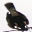

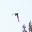

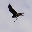

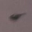

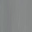

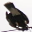

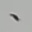

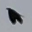

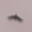

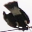

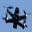

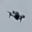

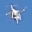

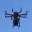

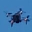

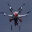

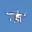

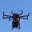

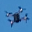

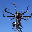

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import os

def process_images(folder_path, category, num_images=10):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:num_images]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        label_path = os.path.join(folder_path, image_file.replace('.jpg', '.txt'))

        # Read the image
        original_image = cv2.imread(image_path)

        # Read the YOLOv8 label
        with open(label_path, 'r') as label_file:
            label_content = label_file.readline().strip().split()

        class_id, center_x, center_y, width, height = map(float, label_content)

        # Calculate bounding box coordinates
        h, w, _ = original_image.shape
        x = int((center_x - width/2) * w)
        y = int((center_y - height/2) * h)
        x_end = int((center_x + width/2) * w)
        y_end = int((center_y + height/2) * h)

        # Crop the bounding box from the original image
        cropped_image = original_image[y:y_end, x:x_end]

        # Resize the new image to 32x32 pixels
        resized_image = cv2.resize(cropped_image, (32, 32))

        # Display the new image
        cv2_imshow(resized_image)

# Process 10 images of birds
bird_folder = '/content/drive/MyDrive/Road2/AI_Course/lesson_6/bird_data'
process_images(bird_folder, 'bird', num_images=10)

# Process 10 images of drones
drone_folder = '/content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data'
process_images(drone_folder, 'drone', num_images=10)


the last code snippet worked perfectly. can you please update the code so that it goes over all the images of birds in this path: /content/drive/MyDrive/Road2/AI_Course/lesson_6/bird_data, and does the following things with each image:

1. extract the bounding box from the yolov8 label stored in the same folder: /content/drive/MyDrive/Road2/AI_Course/lesson_6/bird_data (the image's corresponding label can be recognized by having the same name as the image but with the suffix .txt)

2. create a new image by cropping the bounding box from the original image

3. resize the new image to be 32 by 32 pixels

4. save the new image in this folder: /content/dataset/0

then the code will go over all the images of drones in this folder: /content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data, and does the same with each of them:

1. extract the bounding box from the yolov8 label stored in the same folder: /content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data (the image's corresponding label can be recognized by having the same name as the image but with the suffix .txt)

2. create a new image by cropping the bounding box from the original image

3. resize the new image to be 32 by 32 pixels

4. save the new image in this folder: /content/dataset/1

after every 100 images created, pleasep print a message

In [2]:
import cv2
import os

def process_images(folder_path, category, output_folder, num_images=None, print_interval=100):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:num_images]

    for i, image_file in enumerate(image_files, start=1):
        image_path = os.path.join(folder_path, image_file)
        label_path = os.path.join(folder_path, image_file.replace('.jpg', '.txt'))

        # Read the image
        original_image = cv2.imread(image_path)

        # Read the YOLOv8 label
        with open(label_path, 'r') as label_file:
            label_content = label_file.readline().strip().split()

        class_id, center_x, center_y, width, height = map(float, label_content)

        # Calculate bounding box coordinates
        h, w, _ = original_image.shape
        x = int((center_x - width/2) * w)
        y = int((center_y - height/2) * h)
        x_end = int((center_x + width/2) * w)
        y_end = int((center_y + height/2) * h)

        # Crop the bounding box from the original image
        cropped_image = original_image[y:y_end, x:x_end]

        # Resize the new image to 32x32 pixels
        resized_image = cv2.resize(cropped_image, (32, 32))

        # Save the new image to the output folder
        output_folder_path = os.path.join(output_folder, str(class_id))
        os.makedirs(output_folder_path, exist_ok=True)
        output_path = os.path.join(output_folder_path, f"{category}_{i}.jpg")
        cv2.imwrite(output_path, resized_image)

        # Print a message after every print_interval images
        if i % print_interval == 0:
            print(f"Processed {i} images of {category}")

# Process images of birds
bird_folder = '/content/drive/MyDrive/Road2/AI_Course/lesson_6/bird_data'
bird_output_folder = '/content/dataset/0'
process_images(bird_folder, 'bird', bird_output_folder)

# Process images of drones
drone_folder = '/content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data'
drone_output_folder = '/content/dataset/1'
process_images(drone_folder, 'drone', drone_output_folder)


Processed 100 images of bird
Processed 200 images of bird
Processed 300 images of bird
Processed 400 images of bird
Processed 500 images of bird
Processed 600 images of bird
Processed 700 images of bird
Processed 800 images of bird
Processed 900 images of bird
Processed 1000 images of bird
Processed 1100 images of bird
Processed 1200 images of bird
Processed 1300 images of bird
Processed 1400 images of bird
Processed 1500 images of bird
Processed 1600 images of bird
Processed 1700 images of bird
Processed 1800 images of bird
Processed 1900 images of bird
Processed 2000 images of bird
Processed 2100 images of bird
Processed 2200 images of bird
Processed 2300 images of bird
Processed 2400 images of bird
Processed 2500 images of bird
Processed 2600 images of bird
Processed 2700 images of bird
Processed 2800 images of bird
Processed 2900 images of bird
Processed 3000 images of bird
Processed 3100 images of bird
Processed 3200 images of bird
Processed 3300 images of bird
Processed 3400 imag

please write a code the shows how many files are in the following folders:
/content/dataset/0/1.0
/content/dataset/1/0.0
/content/dataset/2

In [7]:
import os

def count_files(folder_path):
    try:
        file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"Number of files in {folder_path}: {file_count}")
    except FileNotFoundError:
        print(f"Folder {folder_path} not found.")

# Count files in each specified folder
count_files('/content/dataset/0/1.0')
count_files('/content/dataset/1/0.0')
count_files('/content/dataset/2')


Number of files in /content/dataset/0/1.0: 3801
Number of files in /content/dataset/1/0.0: 4070
Number of files in /content/dataset/2: 4070


(i will rerun this code each time i want to verify the amount of files in these folders)

can you please write a code that goes over 10 of the images in this folder: /content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data, and does the following things with each of the images:

1. create a new image by cropping a 32 by 32 pixels area from a truely random location in the image

2. print the new image

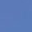

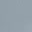

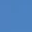

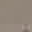

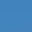

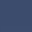

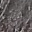

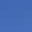

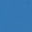

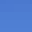

In [5]:
from google.colab.patches import cv2_imshow
import cv2
import os
import random

def process_images_random_crop(folder_path, num_images=10):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:num_images]

    for i, image_file in enumerate(image_files, start=1):
        image_path = os.path.join(folder_path, image_file)

        # Read the image
        original_image = cv2.imread(image_path)

        # Get random coordinates for cropping a 32x32 area
        h, w, _ = original_image.shape
        x_start = random.randint(0, w - 32)
        y_start = random.randint(0, h - 32)
        x_end = x_start + 32
        y_end = y_start + 32

        # Crop the 32x32 area from the original image
        cropped_image = original_image[y_start:y_end, x_start:x_end]

        # Print the new image using cv2_imshow
        cv2_imshow(cropped_image)

# Process 10 images with random cropping
drone_folder = '/content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data'
process_images_random_crop(drone_folder, num_images=10)


the last code snippet worked perfectly. please update the code so that it goes over all the images in this folder: /content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data, and does the following things with each of the images:

1. create a new image by cropping a 32 by 32 pixels area from a truely random location in the image

2. save the new image in this folder: /content/dataset/2

the code will print a message after every 100 images it goes over

In [6]:
import cv2
import os
import random

def process_images_random_crop_save(folder_path, output_folder, print_interval=100):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

    for i, image_file in enumerate(image_files, start=1):
        image_path = os.path.join(folder_path, image_file)

        # Read the image
        original_image = cv2.imread(image_path)

        # Get random coordinates for cropping a 32x32 area
        h, w, _ = original_image.shape
        x_start = random.randint(0, w - 32)
        y_start = random.randint(0, h - 32)
        x_end = x_start + 32
        y_end = y_start + 32

        # Crop the 32x32 area from the original image
        cropped_image = original_image[y_start:y_end, x_start:x_end]

        # Save the new image to the output folder
        output_path = os.path.join(output_folder, f"image_{i}.jpg")
        cv2.imwrite(output_path, cropped_image)

        # Print a message after every print_interval images
        if i % print_interval == 0:
            print(f"Processed {i} images")

# Process all images with random cropping and save to /content/dataset/2
drone_folder = '/content/drive/MyDrive/Road2/AI_Course/lesson_6/drone_data'
output_folder = '/content/dataset/2'
process_images_random_crop_save(drone_folder, output_folder, print_interval=100)


Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1800 images
Processed 1900 images
Processed 2000 images
Processed 2100 images
Processed 2200 images
Processed 2300 images
Processed 2400 images
Processed 2500 images
Processed 2600 images
Processed 2700 images
Processed 2800 images
Processed 2900 images
Processed 3000 images
Processed 3100 images
Processed 3200 images
Processed 3300 images
Processed 3400 images
Processed 3500 images
Processed 3600 images
Processed 3700 images
Processed 3800 images
Processed 3900 images
Processed 4000 images


please write a code that creates a tenzorflow dataset from the images in these folders:

/content/dataset/0/1.0 (the images' label is "0") (90% for training, 10% for testing)

/content/dataset/1/0.0 (the images' label is "1") (90% for training, 10% for testing)

/content/dataset/2 (the images' label is "2") (90% for training, 10% for testing)

save the tenzorflow dataset for future use in this folder: /content/dataset

In [8]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.io import read_file
from tensorflow.image import decode_jpeg

def load_and_preprocess_image(image_path, label):
    # Read and decode the image file
    image = read_file(image_path)
    image = decode_jpeg(image, channels=3)  # Assuming color images, adjust if using grayscale

    # Resize the image
    image = resize(image, [32, 32])

    # Normalize pixel values to [0, 1]
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    return image, label

def create_tf_dataset(folder_paths, labels, test_size=0.1):
    all_images = []
    all_labels = []

    for folder_path, label in zip(folder_paths, labels):
        image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            all_images.append(image_path)
            all_labels.append(label)

    # Split into training and testing sets
    train_images, test_images, train_labels, test_labels = train_test_split(
        all_images, all_labels, test_size=test_size, stratify=all_labels, random_state=42
    )

    # Convert labels to one-hot encoding
    train_labels_onehot = to_categorical(train_labels)
    test_labels_onehot = to_categorical(test_labels)

    # Create TensorFlow datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels_onehot))
    test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels_onehot))

    # Load and preprocess images
    train_dataset = train_dataset.map(load_and_preprocess_image)
    test_dataset = test_dataset.map(load_and_preprocess_image)

    # Save datasets
    tf.data.experimental.save(train_dataset, '/content/dataset/train_dataset')
    tf.data.experimental.save(test_dataset, '/content/dataset/test_dataset')

    return train_dataset, test_dataset

# Folder paths and labels
folder_paths = [
    '/content/dataset/0/1.0',
    '/content/dataset/1/0.0',
    '/content/dataset/2',
]
labels = [0, 1, 2]

# Create TensorFlow datasets and save
train_dataset, test_dataset = create_tf_dataset(folder_paths, labels)


Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


please write a code goes over 10 images from this folder: /content/dataset/1/0.0, and does the following with each of the images:

1. create a new image by applying a random flip augmentation on the original image and print it

2. create a new image by applying a color jitter augmentation on the original image and print it

3. create a new image by applying a rotation augmentation on the original image and print it

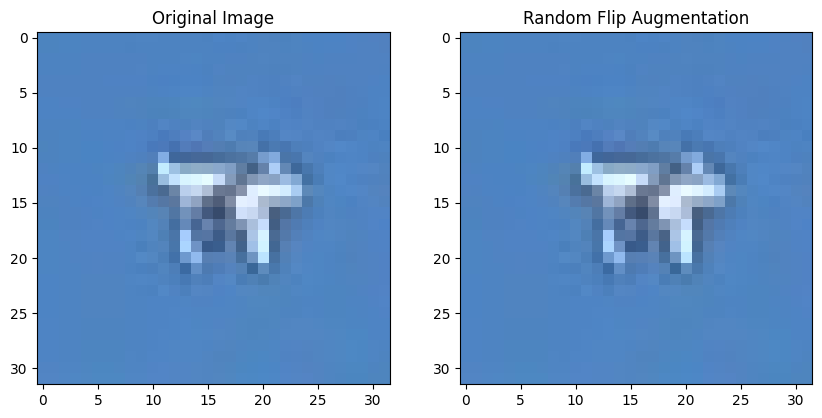

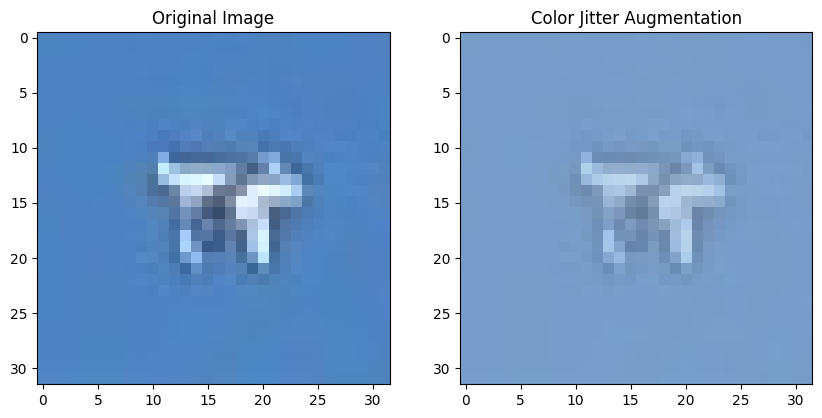

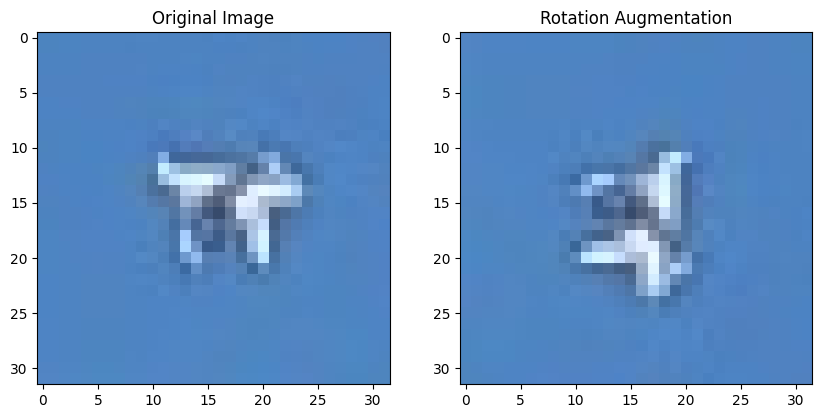

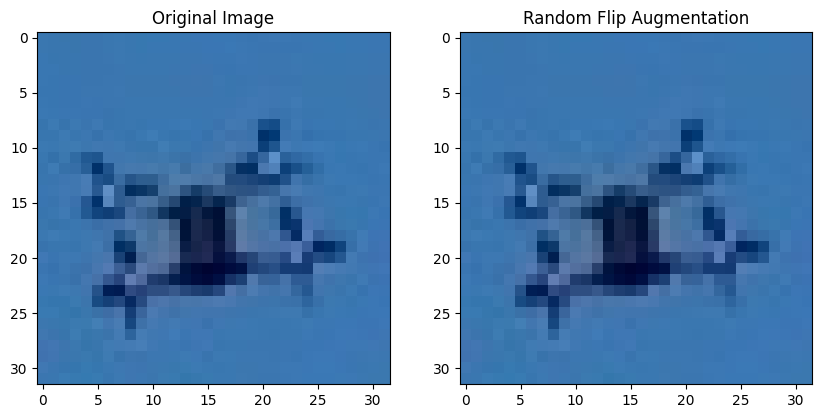

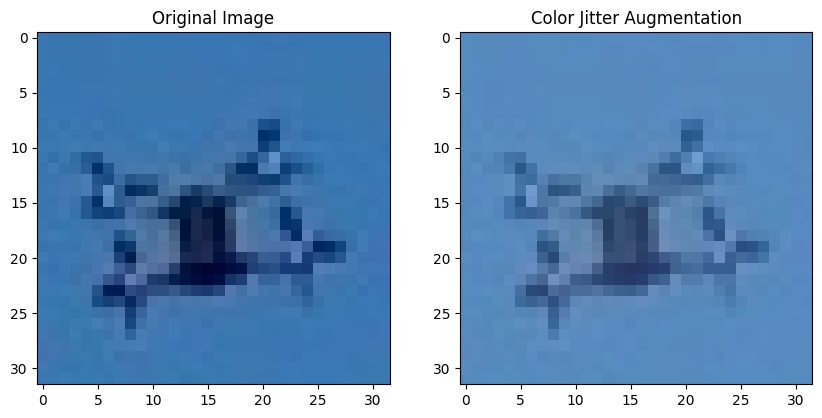

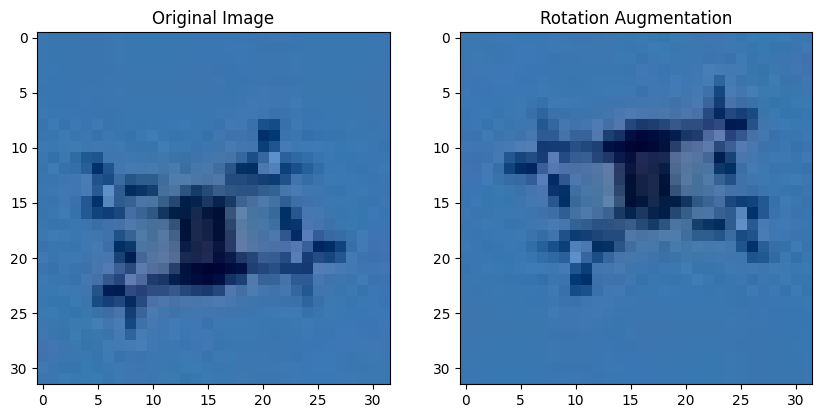

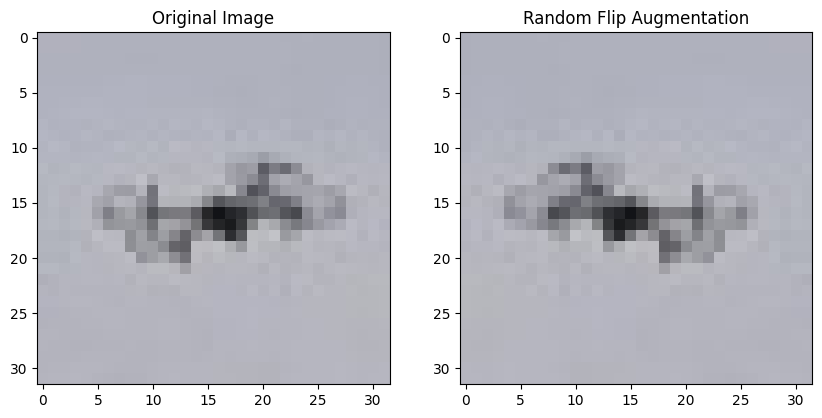

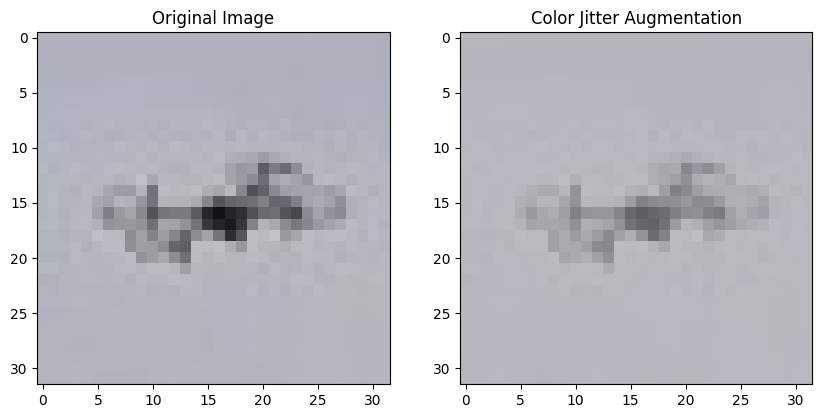

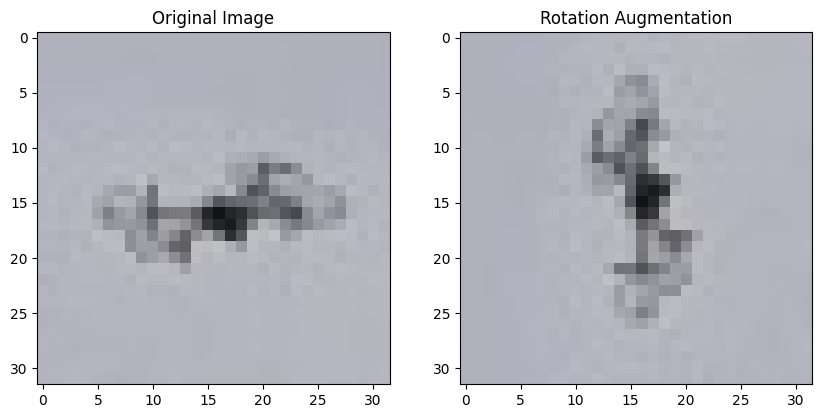

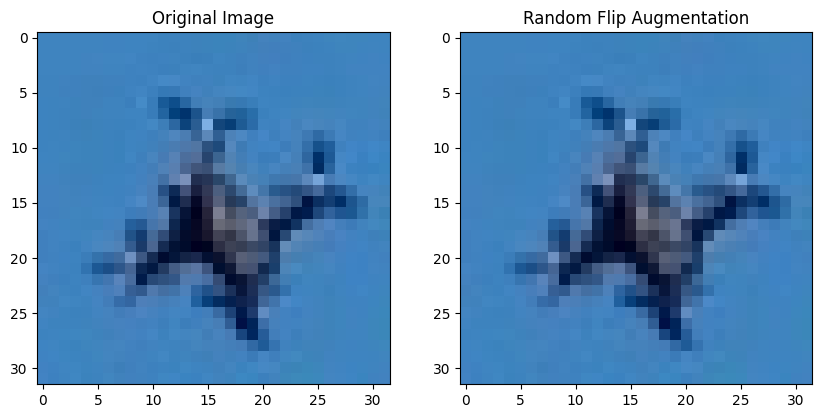

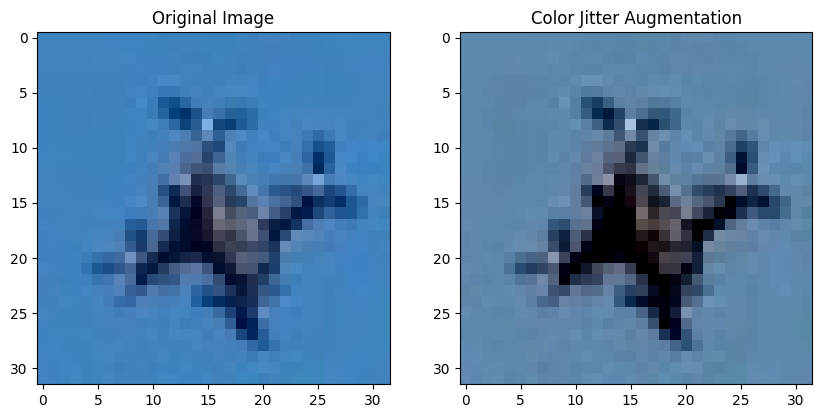

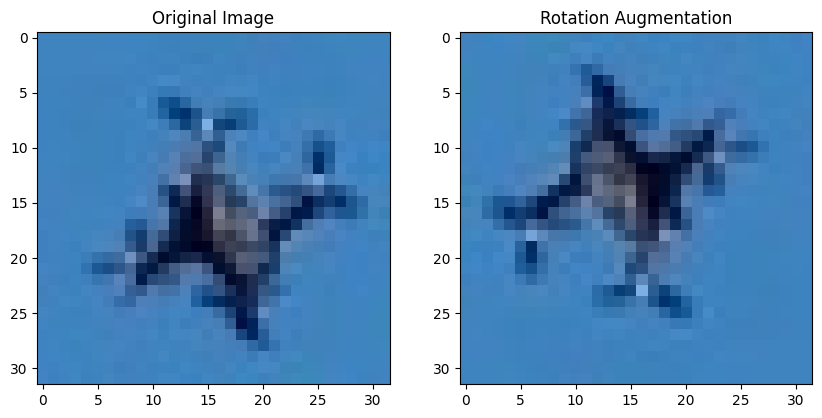

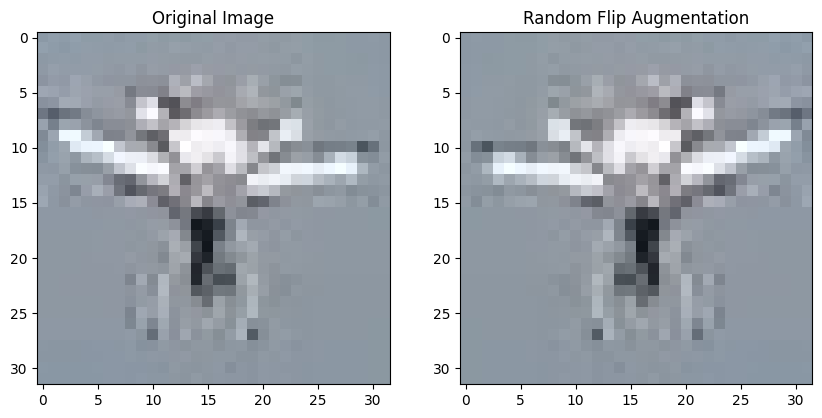

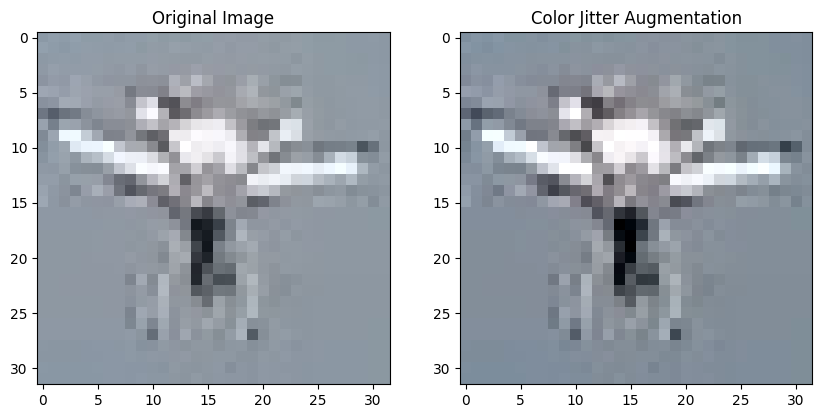

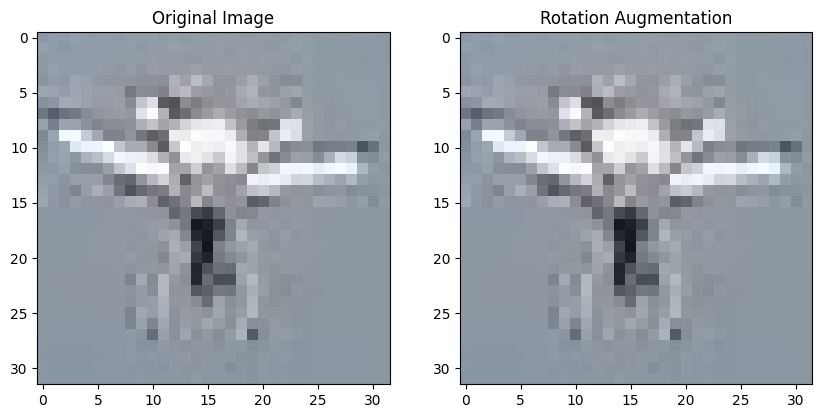

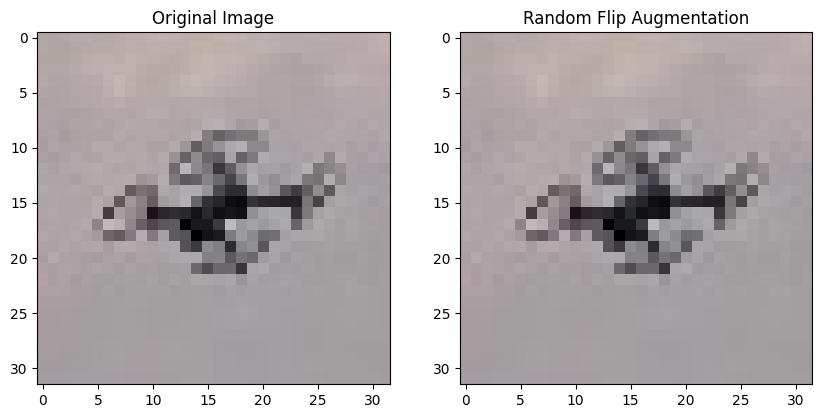

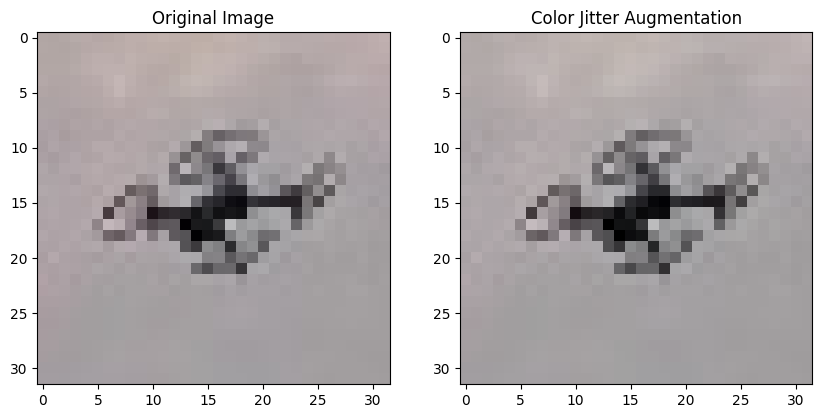

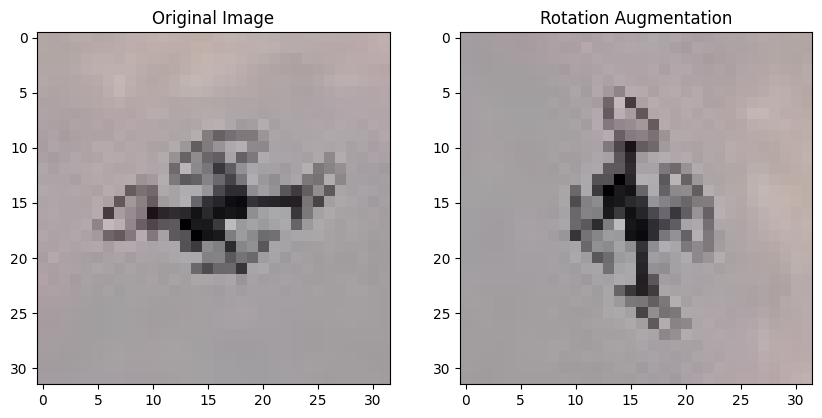

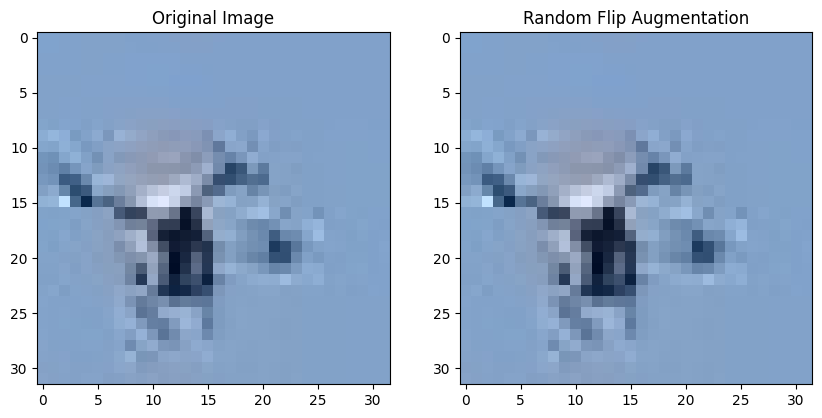

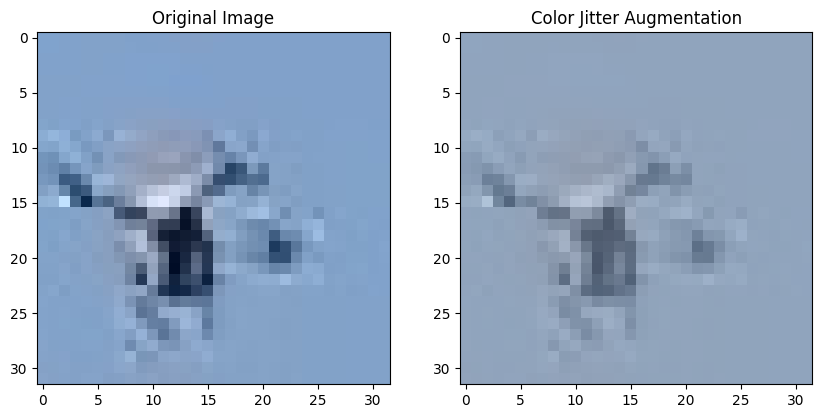

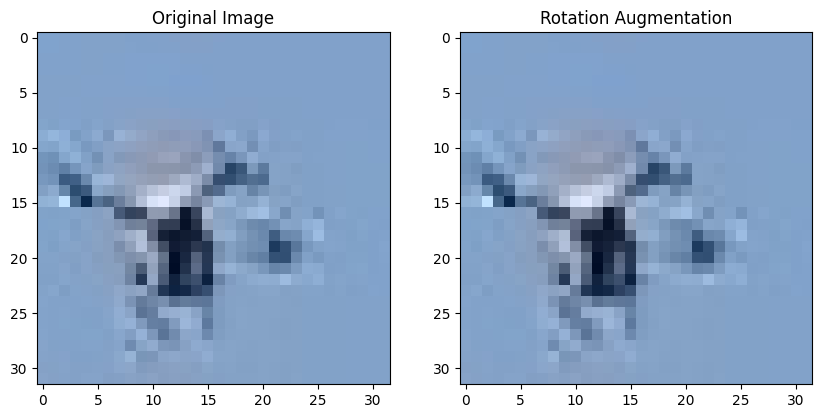

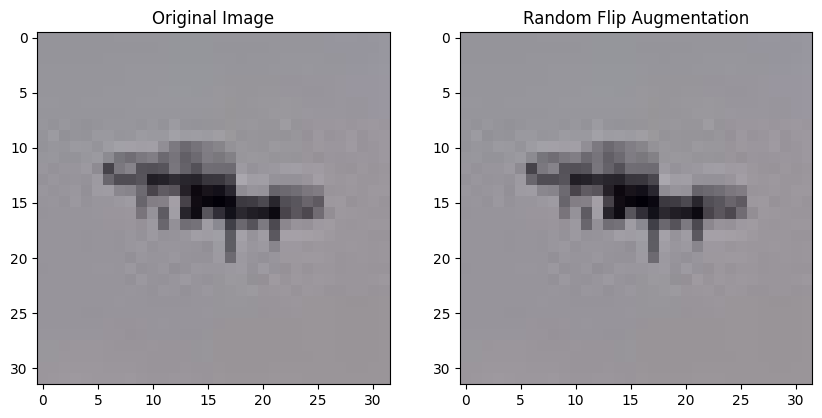

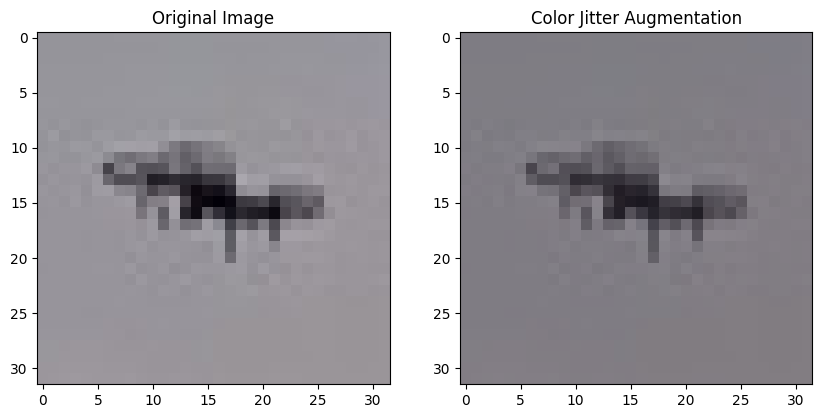

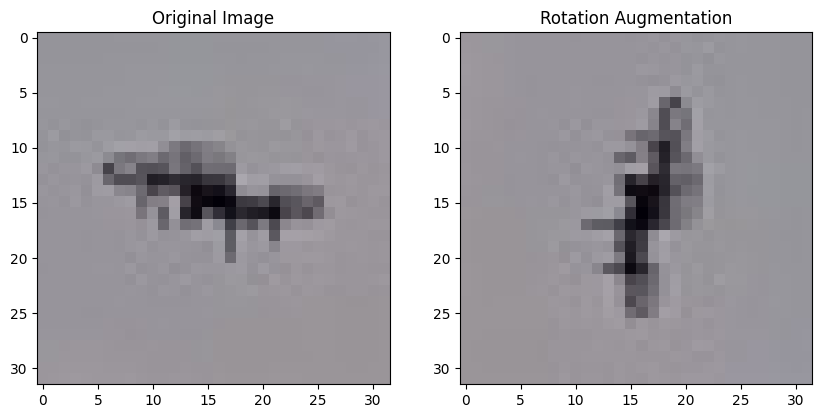

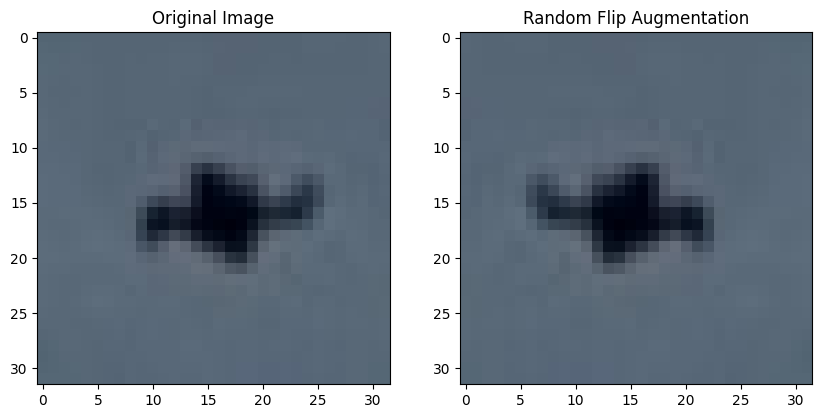

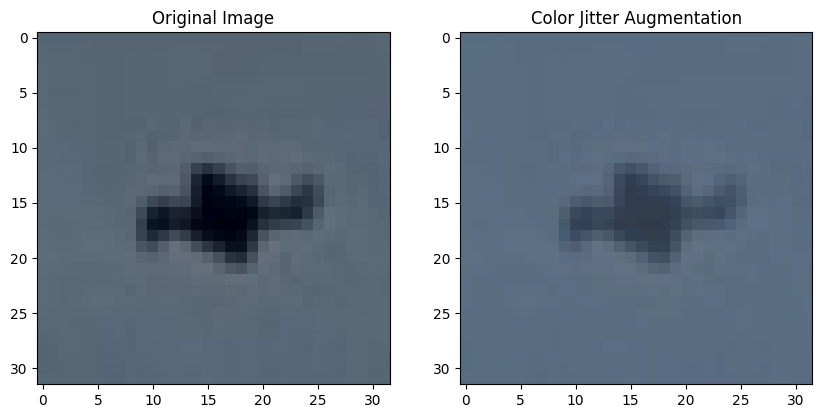

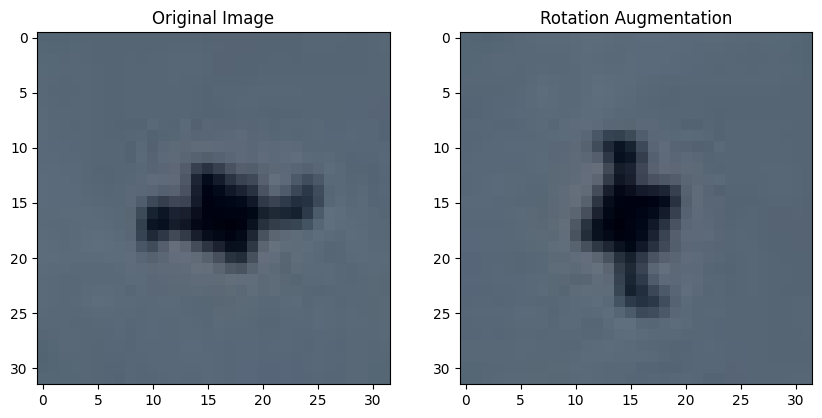

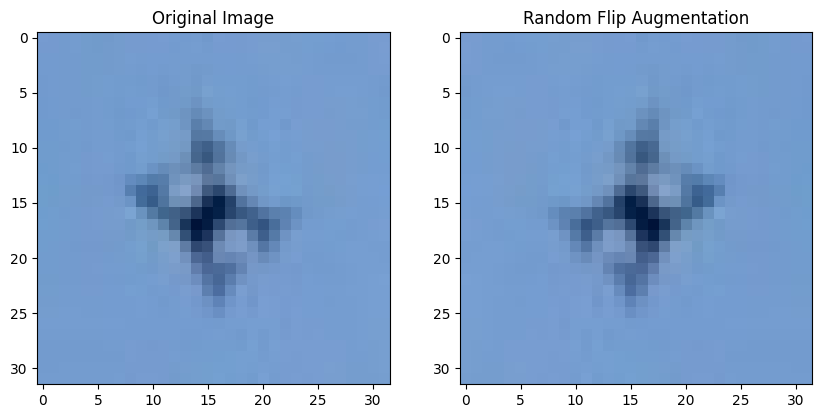

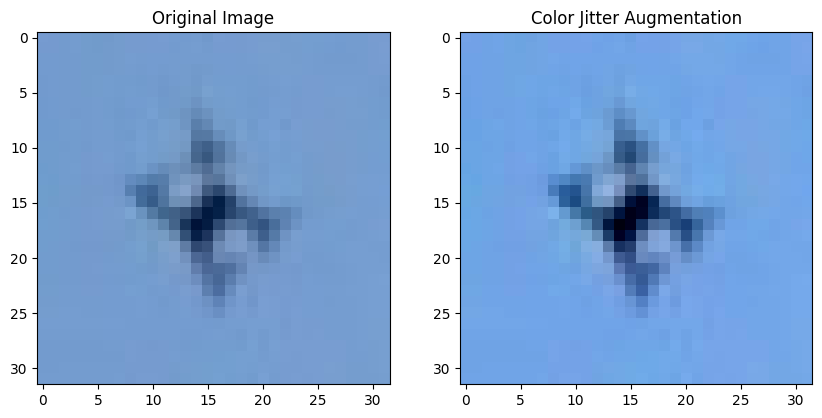

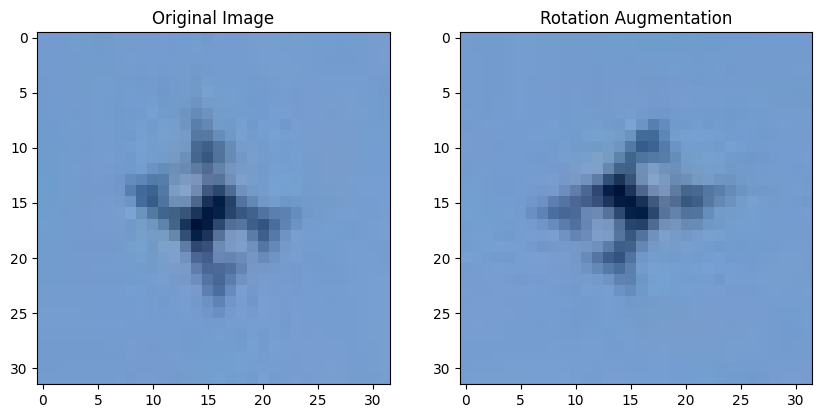

In [9]:
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_image(image_path):
    img = load_img(image_path, target_size=(32, 32))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img_array

def apply_random_flip(image):
    return tf.image.random_flip_left_right(image)

def apply_color_jitter(image):
    return tf.image.random_brightness(tf.image.random_contrast(tf.image.random_saturation(image, 0.5, 1.5), 0.5, 1.5), 0.1)

def apply_rotation(image):
    return tf.image.rot90(image, k=random.randint(1, 4))  # Rotate by 90, 180, or 270 degrees

def display_images(original, augmented, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(augmented)
    plt.title(title)

    plt.show()

def augment_images(folder_path, num_images=10):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')][:num_images]

    for i, image_file in enumerate(image_files, start=1):
        image_path = os.path.join(folder_path, image_file)

        # Load the original image
        original_image = load_image(image_path)

        # Apply random flip augmentation
        flipped_image = apply_random_flip(original_image)
        display_images(original_image, flipped_image, 'Random Flip Augmentation')

        # Apply color jitter augmentation
        jittered_image = apply_color_jitter(original_image)
        display_images(original_image, jittered_image, 'Color Jitter Augmentation')

        # Apply rotation augmentation
        rotated_image = apply_rotation(original_image)
        display_images(original_image, rotated_image, 'Rotation Augmentation')

# Process 10 images with augmentations
folder_path = '/content/dataset/1/0.0'
augment_images(folder_path, num_images=10)


the application of the augmentation worked perfectly, remember how it's been done because we will use thesse augmentations again soon

please create a neural network using keras. the input of the network is an rgb image, and its ouput is the class of the object in the picture: bird (label "0"), drone (label "1"), or other (label "2"). the network normalizes the pixels' value, using map function for best efficiency, and then flatten the image into a vector. lastly, the network uses relu function and then softmax function, and chooses the most probable option as the output. please print the network's architecture

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model = Sequential()

# Normalize pixels using the map function
model.add(tf.keras.layers.Lambda(lambda x: tf.map_fn(lambda img: tf.image.per_image_standardization(img), x)))

# Flatten the image into a vector
model.add(Flatten(input_shape=(32, 32, 3)))  # Assuming input images are 32x32 RGB

# Dense layer with ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Build the model
model.build((None, 32, 32, 3))  # Assuming None for the batch size

# Print the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 32, 32, 3)         0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 393731 (1.50 MB)
Trainable params: 393731 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


please train the network using the training section of the tenzorflow dataset you created. the training section is in this folder: /content/dataset/train_dataset. input each image 4 seperate times like so:

1. the image as it is

2. a copy of the image that is applied with a random flip augmentation

3. a copy of the image that is applied with a color jitter augmentation

4. a copy of the image that is applied with a rotation augmentation

train the network over 30 epochs, with batches of 100, using adam's optimizer.

print the network's learning curve

**(i changed the amount of epochs manually in the after applying the training and testing the network because i suspected 30 epochs led to a case of overfitting)**

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


Epoch 1/15


Instructions for updating:
Use fn_output_signature instead


430/430 [==============================] - 31s 58ms/step - loss: 0.4446 - accuracy: 0.8614
Epoch 2/15
430/430 [==============================] - 27s 63ms/step - loss: 0.3125 - accuracy: 0.9051
Epoch 3/15
430/430 [==============================] - 28s 63ms/step - loss: 0.2636 - accuracy: 0.9195
Epoch 4/15
430/430 [==============================] - 27s 63ms/step - loss: 0.2569 - accuracy: 0.9235
Epoch 5/15
430/430 [==============================] - 25s 57ms/step - loss: 0.2444 - accuracy: 0.9261
Epoch 6/15
430/430 [==============================] - 24s 56ms/step - loss: 0.2202 - accuracy: 0.9330
Epoch 7/15
430/430 [==============================] - 25s 58ms/step - loss: 0.2137 - accuracy: 0.9339
Epoch 8/15
430/430 [==============================] - 24s 56ms/step - loss: 0.2155 - accuracy: 0.9382
Epoch 9/15
430/430 [==============================] - 27s 61ms/step - loss: 0.2074 - accuracy: 0.9375
Epoch 10/15
430/430 [==============================] - 27s 62ms/step - loss: 0.2125 - accurac

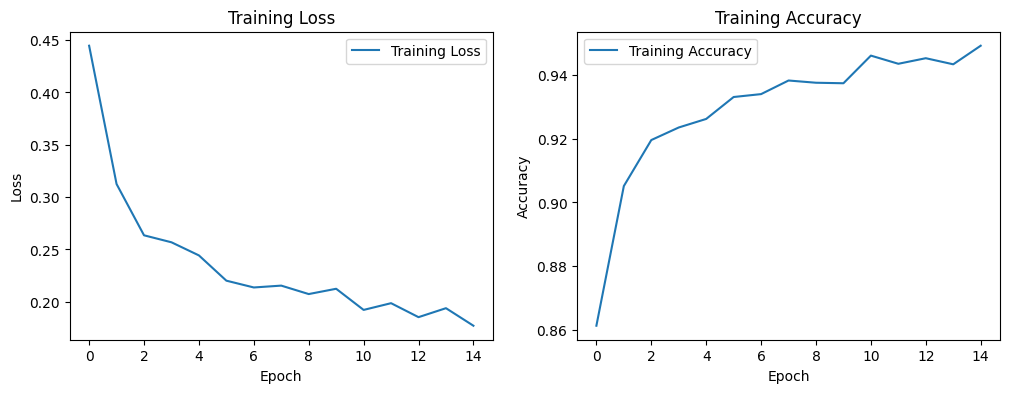

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the TensorFlow datasets
train_dataset_path = '/content/dataset/train_dataset'
train_dataset = tf.data.experimental.load(train_dataset_path)

# Define the model
model = Sequential([
    tf.keras.layers.Lambda(lambda x: tf.map_fn(lambda img: tf.image.per_image_standardization(img), x, dtype=tf.float32)),
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a function to apply augmentations using tf.py_function
def apply_augmentation(image, label):
    img = tf.numpy_function(apply_augmentation_np, [image], tf.float32)
    img.set_shape((32, 32, 3))
    return img, label

def apply_augmentation_np(image):
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        brightness_range=[0.5, 1.5],
        rotation_range=45
    )
    augmented_image = datagen.random_transform(image)
    return augmented_image

# Apply augmentations to the dataset using map and tf.py_function
final_dataset = train_dataset.map(apply_augmentation)

# Repeat the dataset for 4 times for each image
final_dataset = final_dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensors((x, y)).repeat(4))

# Shuffle and batch the dataset
final_dataset = final_dataset.shuffle(buffer_size=1000).batch(100)

# Train the model
history = model.fit(final_dataset, epochs=15)

# Plot the learning curve
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


please test the network using the entire testing section of the tenzorflow dataset you created. the testing section is in this folder: /content/dataset/test_dataset. after the test, show a model accuracy graph that includes the training curve and test accuracy per epoch. lastly, visualize a confusion matrix of the test's results

3/3 [==============================] - 0s 10ms/step


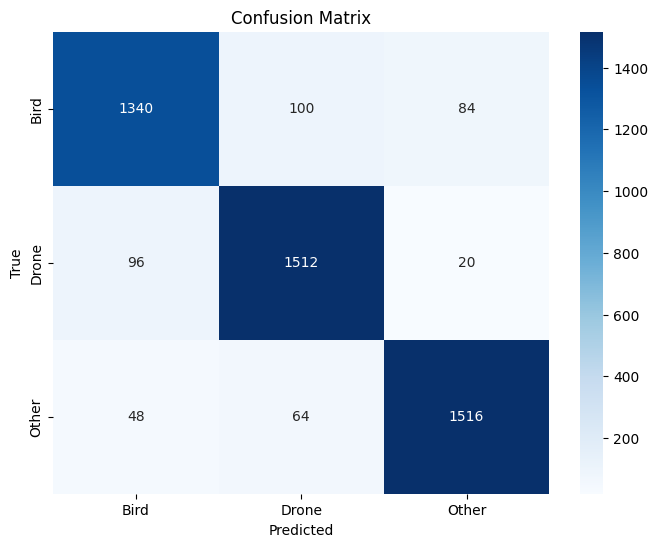


Classification Report:
               precision    recall  f1-score   support

        Bird       0.90      0.88      0.89      1524
       Drone       0.90      0.93      0.92      1628
       Other       0.94      0.93      0.93      1628

    accuracy                           0.91      4780
   macro avg       0.91      0.91      0.91      4780
weighted avg       0.91      0.91      0.91      4780



In [12]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
# model = tf.keras.models.load_model('/path/to/your/model')

# Load the test dataset
test_dataset = tf.data.experimental.load('/content/dataset/test_dataset')
# Apply augmentations to the dataset using map and tf.py_function
final_test_dataset = test_dataset.map(apply_augmentation)

# Repeat the dataset for 4 times for each image
final_test_dataset = final_test_dataset.flat_map(lambda x, y: tf.data.Dataset.from_tensors((x, y)).repeat(4))

# Shuffle and batch the dataset
final_test_dataset = final_test_dataset.shuffle(buffer_size=1000).batch(100)
# Predict labels for the test dataset
y_true = []
y_pred = []

for x, y in final_test_dataset:
    batch_size = tf.shape(x)[0]
    y_true.extend(y.numpy().argmax(axis=1))  # Extend the true labels
    y_pred.extend(np.argmax(model.predict(x), axis=-1))

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
class_names = ['Bird', 'Drone', 'Other']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=class_names))
